In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, concatenate, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load preprocessed data
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Thesis/Train_dataset_3.csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Thesis/Test_dataset_3.csv', low_memory=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
n_repeats = 5
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'loss': []
}

In [ ]:
def create_sequences(data, seq_length=5):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length, :-1].values
        label = data.iloc[i+seq_length, -1]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


SEQ_LENGTH = 5
FEATURES = train.shape[1] - 1

# Create sequences
X_train, y_train = create_sequences(train, SEQ_LENGTH)
X_test, y_test = create_sequences(test, SEQ_LENGTH)

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_hybrid_model.h5', monitor='val_loss', save_best_only=True)
]


Run 1/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8382 - auc: 0.9159 - loss: 0.4990 - precision: 0.8053 - recall: 0.8846

500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.8383 - auc: 0.9160 - loss: 0.4987 - precision: 0.8054 - recall: 0.8847 - val_accuracy: 0.9056 - val_auc: 0.9857 - val_loss: 0.2233 - val_precision: 0.8505 - val_recall: 0.9843
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9188 - auc: 0.9765 - loss: 0.2704 - precision: 0.8866 - recall: 0.9602

500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9188 - auc: 0.9765 - loss: 0.2704 - precision: 0.8866 - recall: 0.9602 - val_accuracy: 0.9255 - val_auc: 0.9882 - val_loss: 0.1942 - val_precision: 0.8828 - val_recall: 0.9812
Epoch 3/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9301 - auc: 0.9818 - loss: 0.2361 - precision: 0.9053 - recall: 0.9604

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9301 - auc: 0.9818 - loss: 0.2360 - precision: 0.9053 - recall: 0.9604 - val_accuracy: 0.9484 - val_auc: 0.9909 - val_loss: 0.1314 - val_precision: 0.9294 - val_recall: 0.9705
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9372 - auc: 0.9835 - loss: 0.2204 - precision: 0.9146 - recall: 0.9639

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9372 - auc: 0.9835 - loss: 0.2204 - precision: 0.9146 - recall: 0.9639 - val_accuracy: 0.9575 - val_auc: 0.9924 - val_loss: 0.1117 - val_precision: 0.9481 - val_recall: 0.9680
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9430 - auc: 0.9862 - loss: 0.2007 - precision: 0.9216 - recall: 0.9674 - val_accuracy: 0.9527 - val_auc: 0.9932 - val_loss: 0.1168 - val_precision: 0.9333 - val_recall: 0.9753
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9448 - auc: 0.9884 - loss: 0.1849 - precision: 0.9231 - recall: 0.9698 - val_accuracy: 0.9516 - val_auc: 0.9936 - val_loss: 0.1213 - val_precision: 0.9274 - val_recall: 0.9800
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9463 - auc: 0.9895 - loss: 0.1773 - precision: 0.9239 - recall: 0.9714 - val_accuracy: 0.9465 - val_auc: 0.9946 - val_loss: 0.1274 - val_precision: 0.9150 - val_recall: 0.9845
Epoch 8/100
500/500 ━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9507 - auc: 0.9905 - loss: 0.1685 - precision: 0.9322 - recall: 0.9729 - val_accuracy: 0.9567 - val_auc: 0.9952 - val_loss: 0.1033 - val_precision: 0.9354 - val_recall: 0.9812
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9544 - auc: 0.9920 - loss: 0.1513 - precision: 0.9372 - recall: 0.9747

500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9544 - auc: 0.9920 - loss: 0.1513 - precision: 0.9372 - recall: 0.9747 - val_accuracy: 0.9709 - val_auc: 0.9960 - val_loss: 0.0800 - val_precision: 0.9686 - val_recall: 0.9732
Epoch 10/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9565 - auc: 0.9925 - loss: 0.1498 - precision: 0.9414 - recall: 0.9730

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9565 - auc: 0.9925 - loss: 0.1498 - precision: 0.9414 - recall: 0.9730 - val_accuracy: 0.9714 - val_auc: 0.9962 - val_loss: 0.0771 - val_precision: 0.9710 - val_recall: 0.9718
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9566 - auc: 0.9925 - loss: 0.1481 - precision: 0.9404 - recall: 0.9750

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9566 - auc: 0.9925 - loss: 0.1481 - precision: 0.9404 - recall: 0.9750 - val_accuracy: 0.9715 - val_auc: 0.9965 - val_loss: 0.0754 - val_precision: 0.9645 - val_recall: 0.9790
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9606 - auc: 0.9933 - loss: 0.1363 - precision: 0.9453 - recall: 0.9774

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9606 - auc: 0.9933 - loss: 0.1363 - precision: 0.9453 - recall: 0.9774 - val_accuracy: 0.9710 - val_auc: 0.9967 - val_loss: 0.0743 - val_precision: 0.9627 - val_recall: 0.9800
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9621 - auc: 0.9937 - loss: 0.1324 - precision: 0.9483 - recall: 0.9776

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9621 - auc: 0.9937 - loss: 0.1324 - precision: 0.9483 - recall: 0.9776 - val_accuracy: 0.9719 - val_auc: 0.9968 - val_loss: 0.0739 - val_precision: 0.9621 - val_recall: 0.9825
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9607 - auc: 0.9935 - loss: 0.1357 - precision: 0.9460 - recall: 0.9765

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9607 - auc: 0.9935 - loss: 0.1357 - precision: 0.9460 - recall: 0.9765 - val_accuracy: 0.9735 - val_auc: 0.9973 - val_loss: 0.0669 - val_precision: 0.9665 - val_recall: 0.9810
Epoch 15/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9674 - auc: 0.9943 - loss: 0.1224 - precision: 0.9551 - recall: 0.9814

500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9674 - auc: 0.9943 - loss: 0.1224 - precision: 0.9551 - recall: 0.9814 - val_accuracy: 0.9745 - val_auc: 0.9974 - val_loss: 0.0656 - val_precision: 0.9677 - val_recall: 0.9818
Epoch 16/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9668 - auc: 0.9950 - loss: 0.1163 - precision: 0.9549 - recall: 0.9804

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9668 - auc: 0.9950 - loss: 0.1163 - precision: 0.9549 - recall: 0.9804 - val_accuracy: 0.9775 - val_auc: 0.9974 - val_loss: 0.0632 - val_precision: 0.9806 - val_recall: 0.9743
Epoch 17/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9706 - auc: 0.9955 - loss: 0.1083 - precision: 0.9608 - recall: 0.9816

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9706 - auc: 0.9955 - loss: 0.1083 - precision: 0.9608 - recall: 0.9816 - val_accuracy: 0.9779 - val_auc: 0.9974 - val_loss: 0.0612 - val_precision: 0.9756 - val_recall: 0.9803
Epoch 18/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9706 - auc: 0.9959 - loss: 0.1058 - precision: 0.9582 - recall: 0.9842

500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9706 - auc: 0.9959 - loss: 0.1058 - precision: 0.9582 - recall: 0.9842 - val_accuracy: 0.9791 - val_auc: 0.9978 - val_loss: 0.0576 - val_precision: 0.9752 - val_recall: 0.9833
Epoch 19/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9691 - auc: 0.9950 - loss: 0.1153 - precision: 0.9590 - recall: 0.9806

500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9691 - auc: 0.9950 - loss: 0.1153 - precision: 0.9590 - recall: 0.9806 - val_accuracy: 0.9806 - val_auc: 0.9980 - val_loss: 0.0550 - val_precision: 0.9827 - val_recall: 0.9785
Epoch 20/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9720 - auc: 0.9955 - loss: 0.1033 - precision: 0.9625 - recall: 0.9827 - val_accuracy: 0.9809 - val_auc: 0.9980 - val_loss: 0.0555 - val_precision: 0.9846 - val_recall: 0.9770
Epoch 21/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9748 - auc: 0.9967 - loss: 0.0941 - precision: 0.9656 - recall: 0.9846

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9748 - auc: 0.9967 - loss: 0.0942 - precision: 0.9656 - recall: 0.9846 - val_accuracy: 0.9810 - val_auc: 0.9980 - val_loss: 0.0540 - val_precision: 0.9760 - val_recall: 0.9862
Epoch 22/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9722 - auc: 0.9962 - loss: 0.0978 - precision: 0.9631 - recall: 0.9827

500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9722 - auc: 0.9962 - loss: 0.0979 - precision: 0.9631 - recall: 0.9827 - val_accuracy: 0.9811 - val_auc: 0.9982 - val_loss: 0.0525 - val_precision: 0.9789 - val_recall: 0.9835
Epoch 23/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9734 - auc: 0.9967 - loss: 0.0948 - precision: 0.9621 - recall: 0.9855 - val_accuracy: 0.9807 - val_auc: 0.9982 - val_loss: 0.0552 - val_precision: 0.9716 - val_recall: 0.9905
Epoch 24/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9749 - auc: 0.9966 - loss: 0.0905 - precision: 0.9625 - recall: 0.9878

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9749 - auc: 0.9966 - loss: 0.0905 - precision: 0.9625 - recall: 0.9878 - val_accuracy: 0.9826 - val_auc: 0.9983 - val_loss: 0.0506 - val_precision: 0.9782 - val_recall: 0.9872
Epoch 25/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9755 - auc: 0.9968 - loss: 0.0852 - precision: 0.9651 - recall: 0.9866

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9755 - auc: 0.9968 - loss: 0.0852 - precision: 0.9651 - recall: 0.9866 - val_accuracy: 0.9845 - val_auc: 0.9985 - val_loss: 0.0467 - val_precision: 0.9840 - val_recall: 0.9850
Epoch 26/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9758 - auc: 0.9972 - loss: 0.0839 - precision: 0.9664 - recall: 0.9860 - val_accuracy: 0.9837 - val_auc: 0.9985 - val_loss: 0.0468 - val_precision: 0.9813 - val_recall: 0.9862
Epoch 27/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9774 - auc: 0.9972 - loss: 0.0823 - precision: 0.9686 - recall: 0.9871 - val_accuracy: 0.9841 - val_auc: 0.9985 - val_loss: 0.0468 - val_precision: 0.9852 - val_recall: 0.9830
Epoch 28/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9788 - auc: 0.9973 - loss: 0.0815 - precision: 0.9700 - recall: 0.9883

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9788 - auc: 0.9973 - loss: 0.0815 - precision: 0.9700 - recall: 0.9883 - val_accuracy: 0.9847 - val_auc: 0.9987 - val_loss: 0.0436 - val_precision: 0.9838 - val_recall: 0.9858
Epoch 29/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9791 - auc: 0.9976 - loss: 0.0770 - precision: 0.9715 - recall: 0.9876

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9791 - auc: 0.9976 - loss: 0.0770 - precision: 0.9715 - recall: 0.9876 - val_accuracy: 0.9850 - val_auc: 0.9987 - val_loss: 0.0420 - val_precision: 0.9835 - val_recall: 0.9865
Epoch 30/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9789 - auc: 0.9977 - loss: 0.0746 - precision: 0.9708 - recall: 0.9876 - val_accuracy: 0.9834 - val_auc: 0.9984 - val_loss: 0.0473 - val_precision: 0.9763 - val_recall: 0.9908
Epoch 31/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9792 - auc: 0.9978 - loss: 0.0746 - precision: 0.9718 - recall: 0.9869 - val_accuracy: 0.9822 - val_auc: 0.9986 - val_loss: 0.0508 - val_precision: 0.9719 - val_recall: 0.9933
Epoch 32/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9776 - auc: 0.9975 - loss: 0.0796 - precision: 0.9675 - recall: 0.9882 - val_accuracy: 0.9849 - val_auc: 0.9988 - val_loss: 0.0435 - val_precision: 0.9889 - val_recall: 0.9808
Epoch 33/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9813 - auc: 0.9978 - loss: 0.0703 - precision: 0.9730 - recall: 0.9902 - val_accuracy: 0.9855 - val_auc: 0.9988 - val_loss: 0.0402 - val_precision: 0.9821 - val_recall: 0.9890
Epoch 34/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9828 - auc: 0.9983 - loss: 0.0656 - precision: 0.9772 - recall: 0.9891 - val_accuracy: 0.9852 - val_auc: 0.9986 - val_loss: 0.0420 - val_precision: 0.9790 - val_recall: 0.9918
Epoch 35/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9819 - auc: 0.9982 - loss: 0.0654 - precision: 0.9746 - recall: 0.9897 - val_accuracy: 0.9851 - val_auc: 0.9987 - val_loss: 0.0417 - val_precision: 0.9802 - val_recall: 0.9902
Epoch 36/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9821 - auc: 0.9981 - loss: 0.0634 - precision: 0.9743 - recall: 0.9902 - val_accuracy: 0.9795 - val_auc: 0.9985 - val_loss: 0.0558 - val_precision: 0.9664 - val_recall: 0.9935
Epoch 37/100
499/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9837 - auc: 0.9980 - loss: 0.0623 - precision: 0.9762 - recall: 0.9916 - val_accuracy: 0.9875 - val_auc: 0.9988 - val_loss: 0.0376 - val_precision: 0.9885 - val_recall: 0.9865
Epoch 38/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9855 - auc: 0.9985 - loss: 0.0553 - precision: 0.9793 - recall: 0.9922

500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9855 - auc: 0.9985 - loss: 0.0554 - precision: 0.9793 - recall: 0.9921 - val_accuracy: 0.9875 - val_auc: 0.9989 - val_loss: 0.0370 - val_precision: 0.9863 - val_recall: 0.9887
Epoch 39/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9850 - auc: 0.9984 - loss: 0.0560 - precision: 0.9775 - recall: 0.9928 - val_accuracy: 0.9840 - val_auc: 0.9984 - val_loss: 0.0446 - val_precision: 0.9759 - val_recall: 0.9925
Epoch 40/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9830 - auc: 0.9985 - loss: 0.0618 - precision: 0.9774 - recall: 0.9890 - val_accuracy: 0.9840 - val_auc: 0.9991 - val_loss: 0.0442 - val_precision: 0.9916 - val_recall: 0.9762
Epoch 41/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9830 - auc: 0.9984 - loss: 0.0590 - precision: 0.9751 - recall: 0.9913 - val_accuracy: 0.9856 - val_auc: 0.9989 - val_loss: 0.0400 - val_precision: 0.9779 - val_recall: 0.9937
Epoch 42/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9853 - auc: 0.9983 - loss: 0.0552 - precision: 0.9791 - recall: 0.9919 - val_accuracy: 0.9876 - val_auc: 0.9990 - val_loss: 0.0349 - val_precision: 0.9895 - val_recall: 0.9858
Epoch 44/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9849 - auc: 0.9984 - loss: 0.0572 - precision: 0.9794 - recall: 0.9907 - val_accuracy: 0.9836 - val_auc: 0.9990 - val_loss: 0.0447 - val_precision: 0.9924 - val_recall: 0.9747
Epoch 45/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9861 - auc: 0.9987 - loss: 0.0519 - precision: 0.9804 - recall: 0.9918 - val_accuracy: 0.9879 - val_auc: 0.9985 - val_loss: 0.0374 - val_precision: 0.9832 - val_recall: 0.9927
Epoch 46/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9847 - auc: 0.9986 - loss: 0.0529 - precision: 0.9770 - recall: 0.9927 - val_accuracy: 0.9854 - val_auc: 0.9987 - val_loss: 0.0410 - val_precision: 0.9767 - val_recall: 0.9945
Epoch 47/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9876 - auc: 0.9985 - loss: 0.0488 - precision: 0.9814 - recall: 0.9939 - val_accuracy: 0.9880 - val_auc: 0.9994 - val_loss: 0.0320 - val_precision: 0.9892 - val_recall: 0.9868
Epoch 49/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9860 - auc: 0.9990 - loss: 0.0453 - precision: 0.9797 - recall: 0.9929

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9860 - auc: 0.9990 - loss: 0.0454 - precision: 0.9797 - recall: 0.9929 - val_accuracy: 0.9882 - val_auc: 0.9991 - val_loss: 0.0319 - val_precision: 0.9885 - val_recall: 0.9880
Epoch 50/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9884 - auc: 0.9992 - loss: 0.0420 - precision: 0.9826 - recall: 0.9944

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9884 - auc: 0.9992 - loss: 0.0421 - precision: 0.9826 - recall: 0.9944 - val_accuracy: 0.9885 - val_auc: 0.9992 - val_loss: 0.0309 - val_precision: 0.9873 - val_recall: 0.9898
Epoch 51/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9879 - auc: 0.9986 - loss: 0.0486 - precision: 0.9836 - recall: 0.9926 - val_accuracy: 0.9879 - val_auc: 0.9989 - val_loss: 0.0341 - val_precision: 0.9909 - val_recall: 0.9847
Epoch 52/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9874 - auc: 0.9988 - loss: 0.0476 - precision: 0.9825 - recall: 0.9924 - val_accuracy: 0.9881 - val_auc: 0.9992 - val_loss: 0.0323 - val_precision: 0.9849 - val_recall: 0.9915
Epoch 53/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9884 - auc: 0.9991 - loss: 0.0433 - precision: 0.9835 - recall: 0.9934 - val_accuracy: 0.9886 - val_auc: 0.9993 - val_loss: 0.0317 - val_precision: 0.9917 - val_recall: 0.9855
Epoch 54/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9874 - auc: 0.9989 - loss: 0.0457 - precision: 0.9826 - recall: 0.9926 - val_accuracy: 0.9892 - val_auc: 0.9993 - val_loss: 0.0295 - val_precision: 0.9878 - val_recall: 0.9908
Epoch 56/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9876 - auc: 0.9988 - loss: 0.0444 - precision: 0.9823 - recall: 0.9932 - val_accuracy: 0.9885 - val_auc: 0.9992 - val_loss: 0.0313 - val_precision: 0.9907 - val_recall: 0.9862
Epoch 57/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9888 - auc: 0.9992 - loss: 0.0401 - precision: 0.9841 - recall: 0.9938 - val_accuracy: 0.9861 - val_auc: 0.9982 - val_loss: 0.0394 - val_precision: 0.9779 - val_recall: 0.9948
Epoch 58/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9891 - auc: 0.9990 - loss: 0.0411 - precision: 0.9836 - recall: 0.9949 - val_accuracy: 0.9851 - val_auc: 0.9983 - val_loss: 0.0454 - val_precision: 0.9748 - val_recall: 0.9960
Epoch 59/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9900 - auc: 0.9988 - loss: 0.0387 - precision: 0.9845 - recall: 0.9957 - val_accuracy: 0.9892 - val_auc: 0.9993 - val_loss: 0.0285 - val_precision: 0.9917 - val_recall: 0.9868
Epoch 62/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9901 - auc: 0.9992 - loss: 0.0371 - precision: 0.9857 - recall: 0.9945 - val_accuracy: 0.9891 - val_auc: 0.9994 - val_loss: 0.0290 - val_precision: 0.9929 - val_recall: 0.9852
Epoch 63/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9897 - auc: 0.9993 - loss: 0.0363 - precision: 0.9843 - recall: 0.9952 - val_accuracy: 0.9889 - val_auc: 0.9993 - val_loss: 0.0290 - val_precision: 0.9924 - val_recall: 0.9852
Epoch 64/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9892 - auc: 0.9993 - loss: 0.0389 - precision: 0.9845 - recall: 0.9938

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9892 - auc: 0.9993 - loss: 0.0389 - precision: 0.9845 - recall: 0.9938 - val_accuracy: 0.9902 - val_auc: 0.9993 - val_loss: 0.0266 - val_precision: 0.9885 - val_recall: 0.9920
Epoch 65/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9914 - auc: 0.9995 - loss: 0.0314 - precision: 0.9872 - recall: 0.9956

500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9914 - auc: 0.9995 - loss: 0.0315 - precision: 0.9872 - recall: 0.9956 - val_accuracy: 0.9895 - val_auc: 0.9992 - val_loss: 0.0266 - val_precision: 0.9902 - val_recall: 0.9887
Epoch 66/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9892 - auc: 0.9992 - loss: 0.0386 - precision: 0.9846 - recall: 0.9939 - val_accuracy: 0.9899 - val_auc: 0.9993 - val_loss: 0.0278 - val_precision: 0.9922 - val_recall: 0.9875
Epoch 67/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9904 - auc: 0.9993 - loss: 0.0338 - precision: 0.9854 - recall: 0.9954 - val_accuracy: 0.9902 - val_auc: 0.9992 - val_loss: 0.0273 - val_precision: 0.9898 - val_recall: 0.9908
Epoch 68/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9889 - auc: 0.9992 - loss: 0.0399 - precision: 0.9847 - recall: 0.9933

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9889 - auc: 0.9992 - loss: 0.0398 - precision: 0.9847 - recall: 0.9934 - val_accuracy: 0.9897 - val_auc: 0.9991 - val_loss: 0.0262 - val_precision: 0.9888 - val_recall: 0.9908
Epoch 69/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9907 - auc: 0.9995 - loss: 0.0337 - precision: 0.9859 - recall: 0.9956 - val_accuracy: 0.9895 - val_auc: 0.9987 - val_loss: 0.0314 - val_precision: 0.9844 - val_recall: 0.9948
Epoch 70/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9896 - auc: 0.9994 - loss: 0.0364 - precision: 0.9853 - recall: 0.9939 - val_accuracy: 0.9894 - val_auc: 0.9989 - val_loss: 0.0306 - val_precision: 0.9839 - val_recall: 0.9950
Epoch 71/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9898 - auc: 0.9992 - loss: 0.0356 - precision: 0.9858 - recall: 0.9942 - val_accuracy: 0.9897 - val_auc: 0.9988 - val_loss: 0.0304 - val_precision: 0.9847 - val_recall: 0.9950
Epoch 72/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9912 - auc: 0.9995 - loss: 0.0312 - precision: 0.9882 - recall: 0.9942 - val_accuracy: 0.9919 - val_auc: 0.9992 - val_loss: 0.0252 - val_precision: 0.9905 - val_recall: 0.9933
Epoch 76/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9912 - auc: 0.9993 - loss: 0.0343 - precision: 0.9873 - recall: 0.9949 - val_accuracy: 0.9904 - val_auc: 0.9989 - val_loss: 0.0286 - val_precision: 0.9868 - val_recall: 0.9940
Epoch 77/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9918 - auc: 0.9993 - loss: 0.0333 - precision: 0.9885 - recall: 0.9952 - val_accuracy: 0.9906 - val_auc: 0.9988 - val_loss: 0.0261 - val_precision: 0.9883 - val_recall: 0.9930
Epoch 78/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9906 - auc: 0.9995 - loss: 0.0333 - precision: 0.9869 - recall: 0.9943 - val_accuracy: 0.9905 - val_auc: 0.9989 - val_loss: 0.0270 - val_precision: 0.9885 - val_recall: 0.9925
Epoch 79/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9921 - auc: 0.9992 - loss: 0.0301 - precision: 0.9886 - recall: 0.9958 - val_accuracy: 0.9910 - val_auc: 0.9993 - val_loss: 0.0238 - val_precision: 0.9917 - val_recall: 0.9902
Epoch 81/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9919 - auc: 0.9995 - loss: 0.0288 - precision: 0.9878 - recall: 0.9960 - val_accuracy: 0.9919 - val_auc: 0.9992 - val_loss: 0.0248 - val_precision: 0.9908 - val_recall: 0.9930
Epoch 82/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9925 - auc: 0.9995 - loss: 0.0275 - precision: 0.9889 - recall: 0.9960 - val_accuracy: 0.9899 - val_auc: 0.9993 - val_loss: 0.0260 - val_precision: 0.9922 - val_recall: 0.9875
Epoch 83/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9918 - auc: 0.9995 - loss: 0.0279 - precision: 0.9883 - recall: 0.9954 - val_accuracy: 0.9912 - val_auc: 0.9988 - val_loss: 0.0263 - val_precision: 0.9874 - val_recall: 0.9952
Epoch 84/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9931 - auc: 0.9996 - loss: 0.0271 - precision: 0.9905 - recall: 0.9958 - val_accuracy: 0.9914 - val_auc: 0.9991 - val_loss: 0.0234 - val_precision: 0.9908 - val_recall: 0.9920
Epoch 88/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9918 - auc: 0.9994 - loss: 0.0297 - precision: 0.9880 - recall: 0.9957 - val_accuracy: 0.9909 - val_auc: 0.9992 - val_loss: 0.0245 - val_precision: 0.9917 - val_recall: 0.9900
Epoch 89/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9923 - auc: 0.9996 - loss: 0.0282 - precision: 0.9890 - recall: 0.9956 - val_accuracy: 0.9922 - val_auc: 0.9992 - val_loss: 0.0245 - val_precision: 0.9915 - val_recall: 0.9930
Epoch 90/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9930 - auc: 0.9995 - loss: 0.0263 - precision: 0.9902 - recall: 0.9957 - val_accuracy: 0.9907 - val_auc: 0.9994 - val_loss: 0.0265 - val_precision: 0.9940 - val_recall: 0.9875
Epoch 91/100
500/500 ━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9932 - auc: 0.9995 - loss: 0.0254 - precision: 0.9902 - recall: 0.9962 - val_accuracy: 0.9925 - val_auc: 0.9993 - val_loss: 0.0227 - val_precision: 0.9905 - val_recall: 0.9945
Epoch 98/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9934 - auc: 0.9995 - loss: 0.0231 - precision: 0.9903 - recall: 0.9966 - val_accuracy: 0.9912 - val_auc: 0.9989 - val_loss: 0.0268 - val_precision: 0.9859 - val_recall: 0.9967
Epoch 99/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9947 - auc: 0.9998 - loss: 0.0199 - precision: 0.9924 - recall: 0.9970 - val_accuracy: 0.9911 - val_auc: 0.9992 - val_loss: 0.0241 - val_precision: 0.9922 - val_recall: 0.9900
Epoch 100/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9946 - auc: 0.9995 - loss: 0.0225 - precision: 0.9926 - recall: 0.9966 - val_accuracy: 0.9920 - val_auc: 0.9991 - val_loss: 0.0229 - val_precision: 0.9915 - val_recall: 0.9925

Run 1 Results:
Test Loss: 0

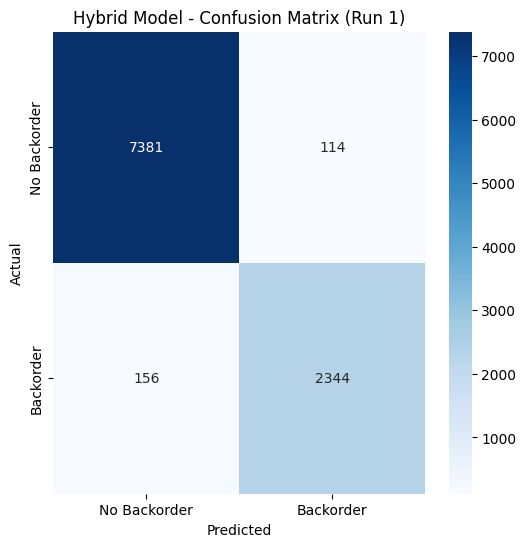


Run 2/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.8170 - auc: 0.8920 - loss: 0.5756 - precision: 0.7949 - recall: 0.8544 - val_accuracy: 0.8775 - val_auc: 0.9844 - val_loss: 0.2624 - val_precision: 0.8090 - val_recall: 0.9883
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9152 - auc: 0.9748 - loss: 0.2813 - precision: 0.8823 - recall: 0.9577 - val_accuracy: 0.9387 - val_auc: 0.9879 - val_loss: 0.1611 - val_precision: 0.9089 - val_recall: 0.9753
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9276 - auc: 0.9807 - loss: 0.2418 - precision: 0.9008 - recall: 0.9610 - val_accuracy: 0.9392 - val_auc: 0.9903 - val_loss: 0.1541 - val_precision: 0.9086 - val_recall: 0.9768
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9363 - auc: 0.9837 - loss: 0.2192 - precision: 0.9112 - recall: 0.9667 - val_accuracy: 0.9556 - val_auc: 0.9913 - val_loss: 0.1179 - val_precision: 0.9514 - val_recall: 0.9603
Epoch 5/100

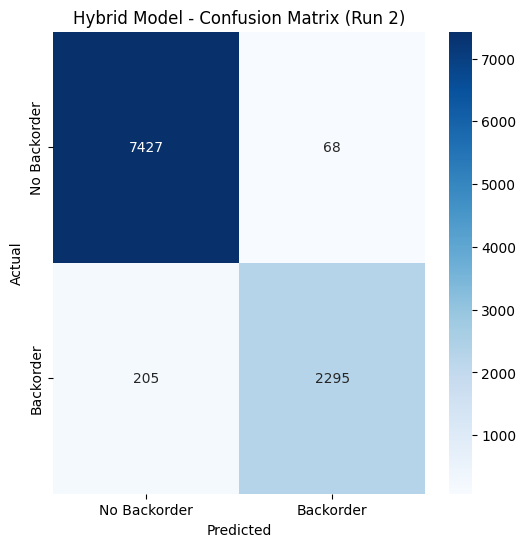


Run 3/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8213 - auc: 0.8960 - loss: 0.5627 - precision: 0.8056 - recall: 0.8465 - val_accuracy: 0.9439 - val_auc: 0.9854 - val_loss: 0.1923 - val_precision: 0.9398 - val_recall: 0.9485
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9211 - auc: 0.9763 - loss: 0.2685 - precision: 0.8964 - recall: 0.9524 - val_accuracy: 0.9475 - val_auc: 0.9891 - val_loss: 0.1381 - val_precision: 0.9330 - val_recall: 0.9643
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9293 - auc: 0.9812 - loss: 0.2395 - precision: 0.9051 - recall: 0.9582 - val_accuracy: 0.9539 - val_auc: 0.9912 - val_loss: 0.1211 - val_precision: 0.9475 - val_recall: 0.9610
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9401 - auc: 0.9848 - loss: 0.2110 - precision: 0.9212 - recall: 0.9629 - val_accuracy: 0.9584 - val_auc: 0.9928 - val_loss: 0.1097 - val_precision: 0.9506 - val_recall: 0.9670
Epoch 5/100

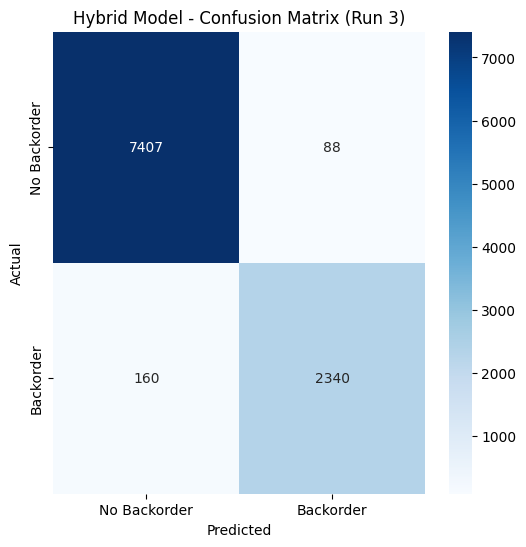


Run 4/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8181 - auc: 0.8966 - loss: 0.5685 - precision: 0.8056 - recall: 0.8418 - val_accuracy: 0.9421 - val_auc: 0.9859 - val_loss: 0.2045 - val_precision: 0.9485 - val_recall: 0.9350
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9185 - auc: 0.9751 - loss: 0.2758 - precision: 0.8888 - recall: 0.9551 - val_accuracy: 0.9384 - val_auc: 0.9891 - val_loss: 0.1535 - val_precision: 0.9094 - val_recall: 0.9737
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9285 - auc: 0.9820 - loss: 0.2369 - precision: 0.9038 - recall: 0.9606 - val_accuracy: 0.9365 - val_auc: 0.9902 - val_loss: 0.1588 - val_precision: 0.9025 - val_recall: 0.9787
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9361 - auc: 0.9838 - loss: 0.2200 - precision: 0.9109 - recall: 0.9652 - val_accuracy: 0.9560 - val_auc: 0.9927 - val_loss: 0.1131 - val_precision: 0.9414 - val_recall: 0.9725
Epoch 5/100

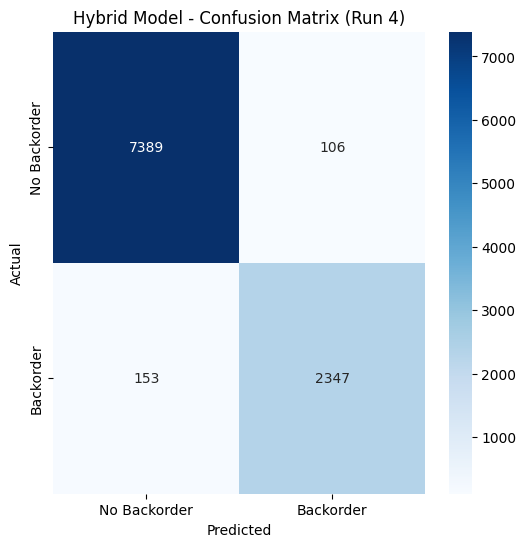


Run 5/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8304 - auc: 0.9074 - loss: 0.5248 - precision: 0.8071 - recall: 0.8672 - val_accuracy: 0.9141 - val_auc: 0.9844 - val_loss: 0.2174 - val_precision: 0.8674 - val_recall: 0.9778
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9203 - auc: 0.9778 - loss: 0.2617 - precision: 0.8890 - recall: 0.9596 - val_accuracy: 0.9339 - val_auc: 0.9880 - val_loss: 0.1635 - val_precision: 0.9037 - val_recall: 0.9712
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9264 - auc: 0.9811 - loss: 0.2404 - precision: 0.9008 - recall: 0.9579 - val_accuracy: 0.9477 - val_auc: 0.9911 - val_loss: 0.1297 - val_precision: 0.9274 - val_recall: 0.9715
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9343 - auc: 0.9847 - loss: 0.2162 - precision: 0.9118 - recall: 0.9619 - val_accuracy: 0.9351 - val_auc: 0.9918 - val_loss: 0.1558 - val_precision: 0.8993 - val_recall: 0.9800
Epoch 5/100

500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9932 - auc: 0.9997 - loss: 0.0218 - precision: 0.9891 - recall: 0.9974 - val_accuracy: 0.9914 - val_auc: 0.9994 - val_loss: 0.0219 - val_precision: 0.9930 - val_recall: 0.9898
Epoch 100/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9934 - auc: 0.9996 - loss: 0.0235 - precision: 0.9901 - recall: 0.9968 - val_accuracy: 0.9915 - val_auc: 0.9993 - val_loss: 0.0250 - val_precision: 0.9874 - val_recall: 0.9958

Run 5 Results:
Test Loss: 0.0944
Test Accuracy: 0.9739
Test Precision: 0.9690
Test Recall: 0.9252
Test AUC: 0.9883
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7495
           1       0.97      0.93      0.95      2500

    accuracy                           0.97      9995
   macro avg       0.97      0.96      0.96      9995
weighted avg       0.97      0.97      0.97      9995



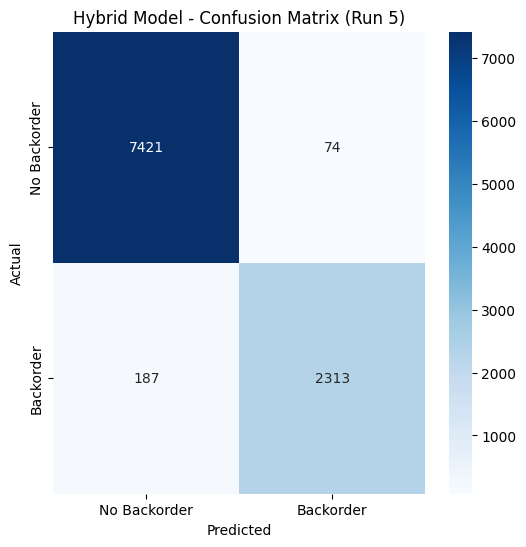

In [ ]:
for run in range(n_repeats):
    print(f"\n{'='*50}")
    print(f"Run {run+1}/{n_repeats}")
    print(f"{'='*50}")

    # Build Hybrid CNN-LSTM Model with consistent settings
    input_layer = Input(shape=(SEQ_LENGTH, FEATURES))

    # CNN Branch (adjusted for SEQ_LENGTH=5)
    cnn_branch = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)

    cnn_branch = Conv1D(128, kernel_size=3, activation='relu', padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = GlobalAveragePooling1D()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)

    # LSTM Branch (same as LSTM model)
    lstm_branch = LSTM(128, return_sequences=True)(input_layer)
    lstm_branch = BatchNormalization()(lstm_branch)
    lstm_branch = Dropout(0.3)(lstm_branch)

    lstm_branch = LSTM(128, return_sequences=False)(lstm_branch)
    lstm_branch = BatchNormalization()(lstm_branch)
    lstm_branch = Dropout(0.3)(lstm_branch)

    # Combine branches
    combined = concatenate([cnn_branch, lstm_branch])

    # Final Dense layers (same as LSTM)
    dense_layer = Dense(64, activation='relu')(combined)
    dense_layer = BatchNormalization()(dense_layer)
    dense_layer = Dropout(0.3)(dense_layer)

    output_layer = Dense(1, activation='sigmoid')(dense_layer)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Same optimizer settings as LSTM
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(name='auc')])

    # Same training parameters as LSTM
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        callbacks=callbacks,
        class_weight={0: 1, 1: 2},  # Same class weights
        verbose=1
    )

    # Same evaluation metrics as LSTM
    results = model.evaluate(X_test, y_test, verbose=0)
    metrics['loss'].append(results[0])
    metrics['accuracy'].append(results[1])
    metrics['precision'].append(results[2])
    metrics['recall'].append(results[3])
    metrics['auc'].append(results[4])

    print(f"\nRun {run+1} Results:")
    print(f"Test Loss: {results[0]:.4f}")
    print(f"Test Accuracy: {results[1]:.4f}")
    print(f"Test Precision: {results[2]:.4f}")
    print(f"Test Recall: {results[3]:.4f}")
    print(f"Test AUC: {results[4]:.4f}")

    # Additional evaluation (classification report and confusion matrix)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Backorder', 'Backorder'],
                yticklabels=['No Backorder', 'Backorder'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Hybrid Model - Confusion Matrix (Run {run+1})')
    plt.show()

In [ ]:
print("\n\nFinal Summary:")
print("="*50)
for metric_name, values in metrics.items():
    mean = np.mean(values)
    std = np.std(values)
    print(f"{metric_name}: {mean:.4f} ± {std:.4f}")



Final Summary:
accuracy: 0.9738 ± 0.0009
precision: 0.9629 ± 0.0068
recall: 0.9311 ± 0.0081
auc: 0.9897 ± 0.0016
loss: 0.0888 ± 0.0085


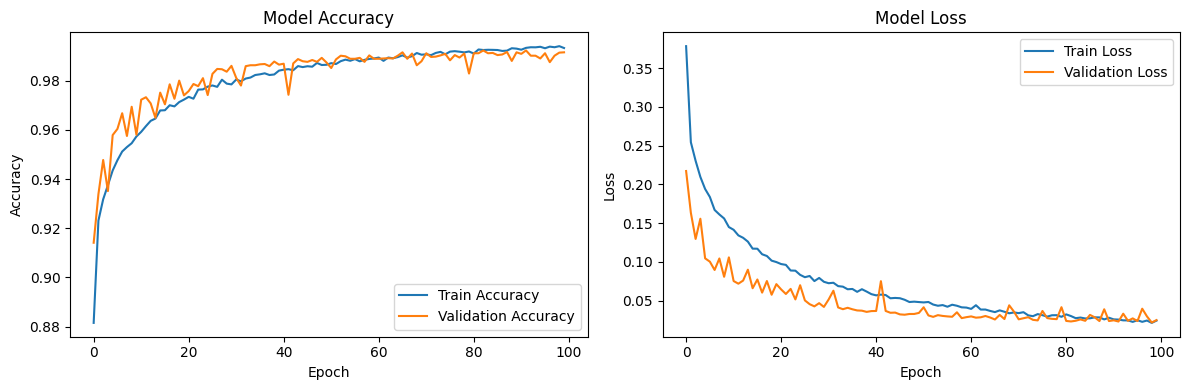

In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# Save final model
model.save('/content/drive/MyDrive/Thesis/backorder_hybrid_model_dataset_3.h5')
print("Hybrid CNN-LSTM model saved successfully!")

Hybrid CNN-LSTM model saved successfully!
